In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [8]:
import pandas as pd
dataNYC = pd.read_csv('/content/dataset_TSMC2014_NYC.csv')
dataTKY = pd.read_csv('/content/dataset_TSMC2014_TKY.csv')

In [9]:
dataNYC = dataNYC[dataNYC['venueCategory'] == 'Bank']
dataTKY = dataTKY[dataTKY['venueCategory'] == 'Bank']

In [10]:
dataNYC.isnull().sum()
dataTKY.isnull().sum()

,0
userId,0
venueId,0
venueCategoryId,0
venueCategory,0
latitude,0
longitude,0
timezoneOffset,0
utcTimestamp,0


In [11]:
data_cleanedNYC = dataNYC.drop_duplicates()
data_cleanedTKY = dataTKY.drop_duplicates()

In [12]:
data_cleanedNYC['city'] = 'New York'
data_cleanedTKY['city'] = 'Tokyo'
data = pd.concat([data_cleanedNYC, data_cleanedTKY])

<ipython-input-12-61fd5cef28bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleanedTKY['city'] = 'Tokyo'


<ipython-input-15-a32af750ac0e>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['local_time'] = pd.to_datetime(data['utcTimestamp']) + pd.to_timedelta(data['timezoneOffset'], unit='m')


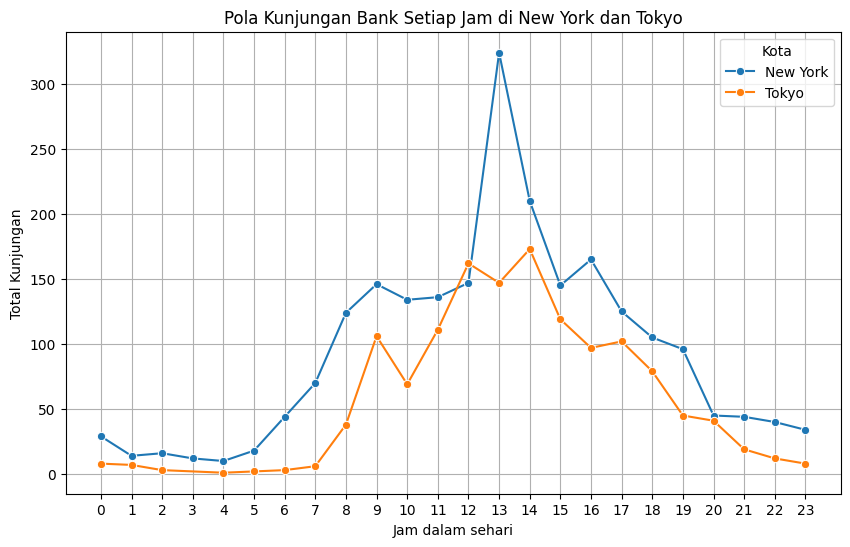

In [15]:
data['local_time'] = pd.to_datetime(data['utcTimestamp']) + pd.to_timedelta(data['timezoneOffset'], unit='m')
data['hour'] = data['local_time'].dt.hour
data['day'] = data['local_time'].dt.date
bank_data = data[data['venueCategory'] == 'Bank']
grouped = bank_data.groupby(['city', 'venueId', 'hour']).size().reset_index(name='visits')
city_patterns = bank_data.groupby(['city', 'hour']).size().reset_index(name='total_visits')
plt.figure(figsize=(10, 6))
sns.lineplot(data=city_patterns, x='hour', y='total_visits', hue='city', marker='o')
plt.title('Pola Kunjungan Bank Setiap Jam di New York dan Tokyo')
plt.xlabel('Jam dalam sehari')
plt.ylabel('Total Kunjungan')
plt.xticks(range(0, 24))
plt.legend(title='Kota')
plt.grid(True)
plt.show()

<ipython-input-16-6319f02ba31e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_visits, x='city', y='total_visits', palette='Set2')


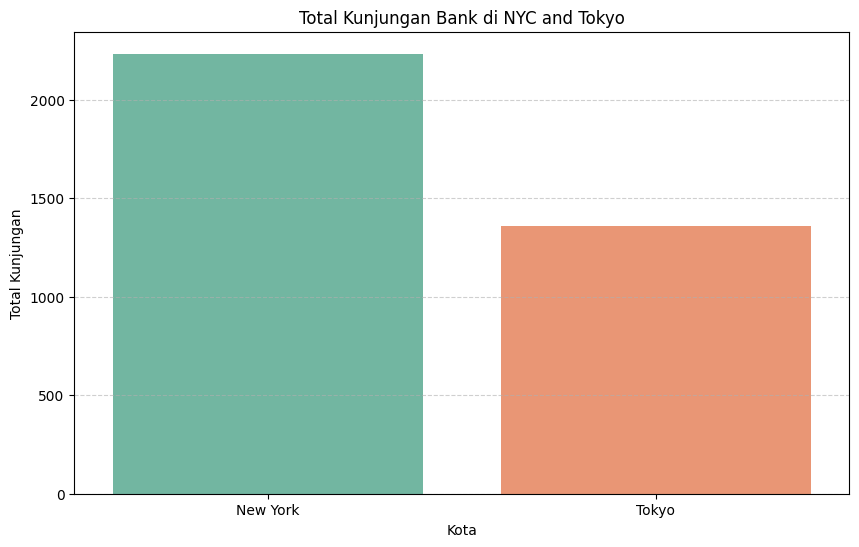

In [16]:
bank_data = data[data['venueCategory'] == 'Bank']
bank_visits = bank_data.groupby(['city', 'venueId']).size().reset_index(name='total_visits')
city_visits = bank_data.groupby('city').size().reset_index(name='total_visits')
plt.figure(figsize=(10, 6))
sns.barplot(data=city_visits, x='city', y='total_visits', palette='Set2')
plt.title('Total Kunjungan Bank di NYC and Tokyo')
plt.xlabel('Kota')
plt.ylabel('Total Kunjungan')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

<ipython-input-17-d2a07464f6eb>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['utc_time'] = pd.to_datetime(data['utcTimestamp'], utc=True)


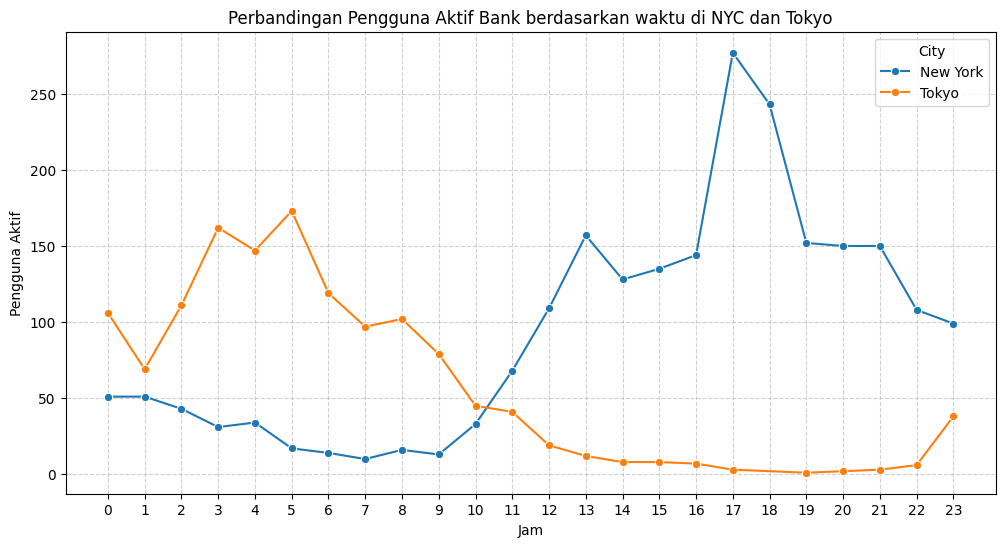

In [17]:
data['utc_time'] = pd.to_datetime(data['utcTimestamp'], utc=True)
data['utc_hour'] = data['utc_time'].dt.hour
utc_activity = data.groupby(['city', 'utc_hour']).size().reset_index(name='activity_count')
plt.figure(figsize=(12, 6))
sns.lineplot(data=utc_activity, x='utc_hour', y='activity_count', hue='city', marker='o')
plt.title('Perbandingan Pengguna Aktif Bank berdasarkan waktu di NYC dan Tokyo')
plt.xlabel('Jam')
plt.ylabel('Pengguna Aktif')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='City')
plt.show()